# Analysis and Visualizing Dog Rating Data

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 22 columns):
tweet_id              1996 non-null int64
timestamp             1996 non-null object
source                1996 non-null object
ret#                  1996 non-null int64
fav#                  1996 non-null int64
text                  1996 non-null object
name                  1996 non-null object
type                  1996 non-null object
expanded_urls         1996 non-null object
rating_numerator      1996 non-null int64
rating_denominator    1996 non-null int64
jpg_url               1996 non-null object
img_num               1996 non-null int64
p1                    1996 non-null object
p1_conf               1996 non-null float64
p1_dog                1996 non-null bool
p2                    1996 non-null object
p2_conf               1996 non-null float64
p2_dog                1996 non-null bool
p3                    1996 non-null object
p3_conf               1996 non-null float

Removing irrelevant columns

In [3]:
df.drop('expanded_urls',axis=1,inplace=True)
df.drop('jpg_url',axis=1,inplace=True)
df.drop('text',axis=1,inplace=True)

In [8]:
df.describe()

,tweet_id,ret#,fav#,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,1.996000e+03,1996.000000,1996.000000,1996.000000,1996.0,1996.000000,1996.000000,1.996000e+03,1.996000e+03
mean,7.362221e+17,2755.740982,8982.841683,11.703407,10.0,1.202906,0.593739,1.343996e-01,6.026488e-02
std,6.785783e+16,4736.693881,12740.691987,40.645360,0.0,0.560533,0.272059,1.006295e-01,5.087979e-02
min,6.660209e+17,13.000000,80.000000,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758512e+17,613.750000,1957.500000,10.000000,10.0,1.000000,0.362775,5.401683e-02,1.616933e-02
50%,7.087246e+17,1333.500000,4078.000000,11.000000,10.0,1.000000,0.587440,1.174550e-01,4.952715e-02
75%,7.882367e+17,3159.250000,11280.250000,12.000000,10.0,1.000000,0.845599,1.948745e-01,9.157912e-02
max,8.924206e+17,77795.000000,144011.000000,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.734190e-01


### Rating 

In [36]:
df['rating_numerator'].quantile([.01,0.99])

0.01     3.0
0.99    14.0
Name: rating_numerator, dtype: float64

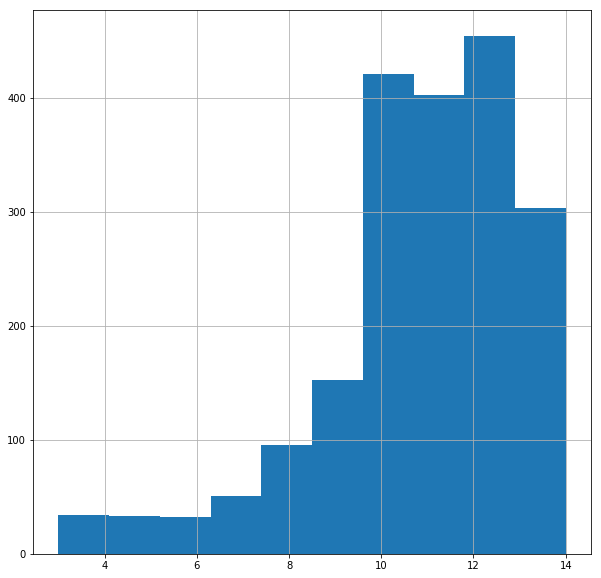

In [50]:

f,ax = plt.subplots(figsize=(10, 10))
df[df['rating_numerator'].between(3,14)]['rating_numerator'].hist(bins=10,ax=ax)

Here's a histogram of the dog rating after removing outliers, we can see the majority of rating is between 11-13, mean value is 11.703407.

### Tweet & Favorate

Text(0.5,1,'Retweets and favorites Scatter plot')

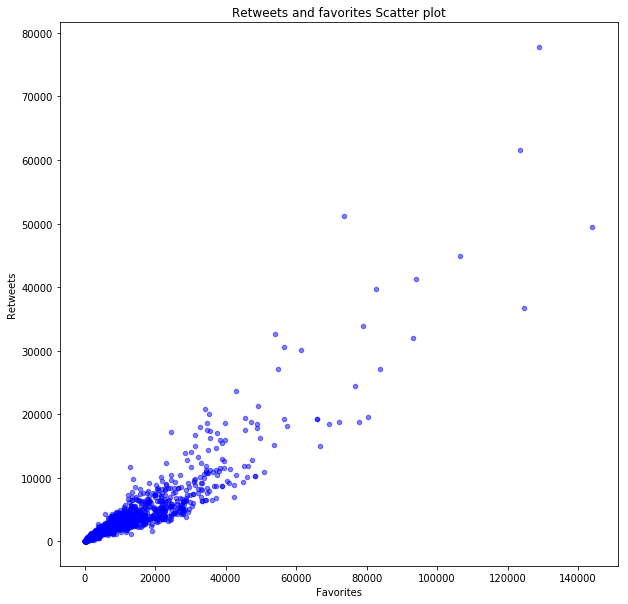

In [57]:
f,ax = plt.subplots(figsize=(10, 10))
df.plot(kind = 'scatter', x = 'fav#', y = 'ret#', alpha = 0.5, color = 'blue',ax=ax)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

It's really easy to think that favorite number and retweet have a strong positive correlations. As more people retweet the tweet it got more explousure for other people to click favorite.

### Device Source

Text(0.5,1,'Source')

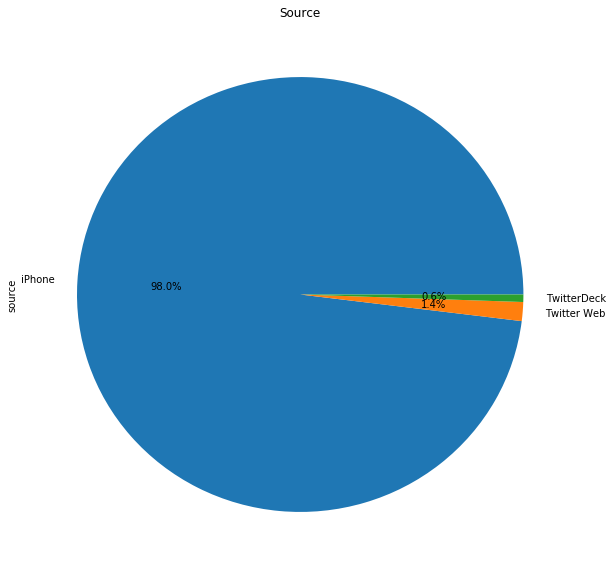

From this pie chart we can see Twitter for iPhone absoloute domintate here. As the primary source for the user @dog_rate to publish the tweet, there's merely 2% out of nearly 2000 are used via TwitterDeck and Web.

### Dog Stage Type

Text(0.5,1,'Dog Stage')

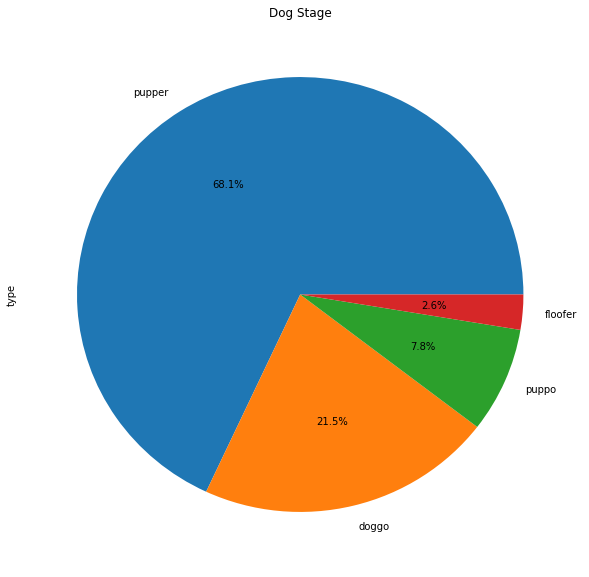

In [61]:
f,ax = plt.subplots(figsize=(10, 10))
df[df['type']!='None']['type'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Dog Stage')

In [63]:
df.groupby('type')['rating_numerator'].mean()

type
None       11.812907
doggo      11.757576
floofer    11.875000
pupper     10.751196
puppo      12.083333
Name: rating_numerator, dtype: float64

From this pie chart & data above we can see majority of dog being rated is pupper, however it have the lowest rating compare to other stages.

### Most Popular Breed

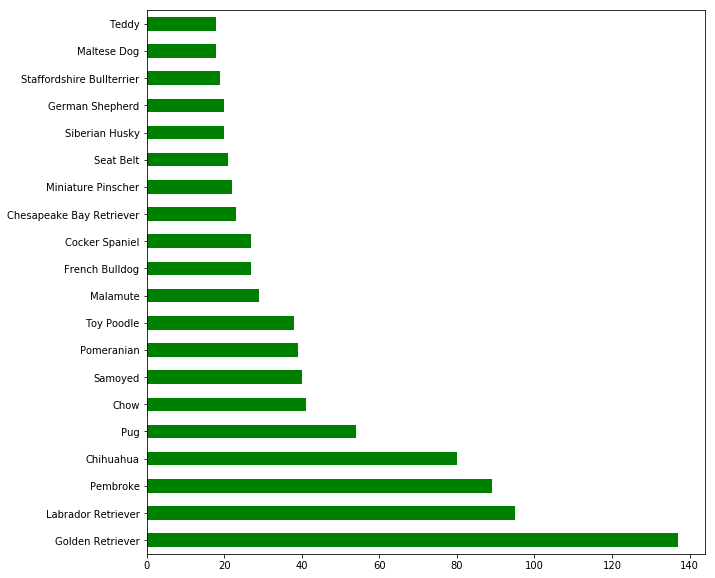

In [75]:
f,ax = plt.subplots(figsize=(10, 10))
df['p1'].value_counts()[0:20].plot(kind = 'barh',ax=ax,color='green')

Here's a bar chart for top-20 rated dog breed, the most welcomed dog breed is Retriever, both Golden Retriever and Labrador Retriever.

Text(0.5,1,'Retweets & Fvorites v.s. Rating Scatter plot')

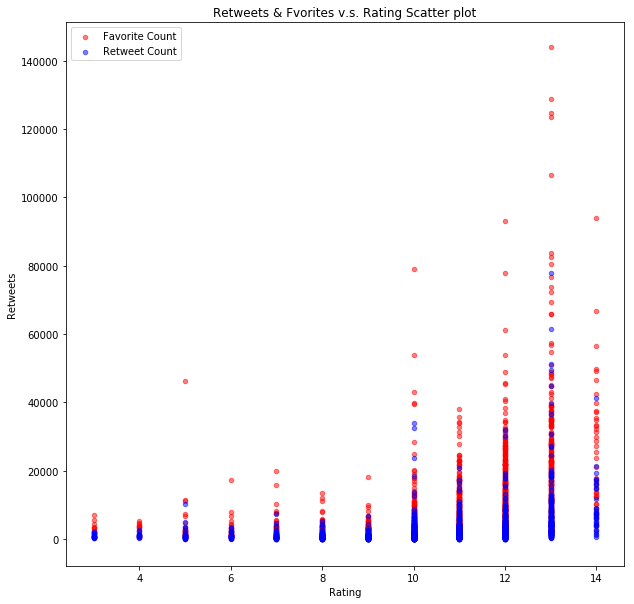

In [92]:
f,ax = plt.subplots(figsize=(10, 10))
ax = df[df['rating_numerator'].between(3,14)].plot.scatter(x = 'rating_numerator' , y = 'fav#',alpha = 0.5, color='red', label='Favorite Count',ax=ax)
df[df['rating_numerator'].between(3,14)].plot(kind = 'scatter', x = 'rating_numerator' , y = 'ret#', alpha = 0.5, color = 'blue', label='Retweet Count',ax=ax)
plt.xlabel('Rating')
plt.ylabel('Retweets')
plt.title('Retweets & Fvorites v.s. Rating Scatter plot')

From this scatter plot we can see that hight rating results a higher number of retweet and favorites.

## Conclusion

In this section we analysis the dog rate data that we did data wrangling, we found some interesting fact. 

I think the the rating method is very innotivative, dog scale is graded always beyoned the nomal scale 1-10, which gives either the onwer of the puppy or the reader of the tweet much suprise and joy.  

However, although most people is trying to sent pupper pictures to be rated and expected a higher score, the fact is puppo & doggo can get a little bit higher.

Nontheness, the higher rating always get more retweet & favorite